# Eksplorasi Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import norm
import math

In [ ]:
# load dataset
dwn_url = 'https://raw.githubusercontent.com/Zaniiiii/Data/main/data_arrhythmia_koma.csv'
df = pd.read_csv(dwn_url)

In [ ]:
# menampilkan 5 baris data
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [ ]:
# menampilkan tipe diagnosis unik
print("unique diagnosis: ",df.diagnosis.unique())
print("banyak macam diagnosis:", len(df.diagnosis.unique()))

unique diagnosis:  [ 8  6 10  1  7 14  3 16  2  4  5  9 15]
banyak macam diagnosis: 13


In [ ]:
# menampilkan summary
df.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


In [ ]:
# menampilkan jumlah baris dan kolom
df.shape

(452, 280)

In [ ]:
# mengacak data
df = df.reset_index(drop=True)
df

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0,0.8,0.9,20.1,25.1,10


# PreProcessing data

In [ ]:
#Mengganti nilai ? menjadi NA
for i in df:
  df[i] = df[i].replace('?', np.nan)

In [ ]:
#melihat jumlah NA
pd.set_option('display.max_rows',None)
df.isna().sum()

age               0
sex               0
height            0
weight            0
qrs_duration      0
p-r_interval      0
q-t_interval      0
t_interval        0
p_interval        0
qrs               0
T                 8
P                22
QRST              1
J               376
heart_rate        1
q_wave            0
r_wave            0
s_wave            0
R'_wave           0
S'_wave           0
AA                0
AB                0
AC                0
AD                0
AE                0
AF                0
AG                0
AH                0
AI                0
AJ                0
AK                0
AL                0
AM                0
AN                0
AO                0
AP                0
AR                0
AS                0
AT                0
AU                0
AV                0
AY                0
AZ                0
AB'               0
BB                0
BC                0
BD                0
BE                0
BF                0
BG                0


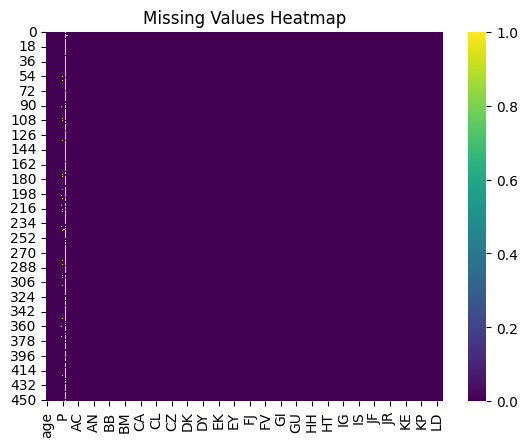

In [ ]:
# Membuat heatmap dari jumlah NA
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#melihat jumlah NA
pd.set_option('display.max_rows',None)
df.isna().sum()

age               0
sex               0
height            0
weight            0
qrs_duration      0
p-r_interval      0
q-t_interval      0
t_interval        0
p_interval        0
qrs               0
T                 8
P                22
QRST              1
J               376
heart_rate        1
q_wave            0
r_wave            0
s_wave            0
R'_wave           0
S'_wave           0
AA                0
AB                0
AC                0
AD                0
AE                0
AF                0
AG                0
AH                0
AI                0
AJ                0
AK                0
AL                0
AM                0
AN                0
AO                0
AP                0
AR                0
AS                0
AT                0
AU                0
AV                0
AY                0
AZ                0
AB'               0
BB                0
BC                0
BD                0
BE                0
BF                0
BG                0


In [ ]:
def replaceWithMedian(df, name):
  df[name] = df[name].replace('?', np.nan)
  median_value = df[name].median()
  df[name] = df[name].fillna(median_value)
  return df

In [ ]:
#melihat jumlah NA
pd.set_option('display.max_rows',None)
df.isna().sum()

age               0
sex               0
height            0
weight            0
qrs_duration      0
p-r_interval      0
q-t_interval      0
t_interval        0
p_interval        0
qrs               0
T                 8
P                22
QRST              1
J               376
heart_rate        1
q_wave            0
r_wave            0
s_wave            0
R'_wave           0
S'_wave           0
AA                0
AB                0
AC                0
AD                0
AE                0
AF                0
AG                0
AH                0
AI                0
AJ                0
AK                0
AL                0
AM                0
AN                0
AO                0
AP                0
AR                0
AS                0
AT                0
AU                0
AV                0
AY                0
AZ                0
AB'               0
BB                0
BC                0
BD                0
BE                0
BF                0
BG                0


In [ ]:
#Mengisi nilai NA pada tiap kolom dengan median kolomnya
for i in df:
  df = replaceWithMedian(df, i)

In [ ]:
#melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(116), int64(159), object(5)
memory usage: 988.9+ KB


In [ ]:
#Mengganti tipe tiap kolom supaya tidak ada object
for i in df:
  df[i] = pd.to_numeric(df[i])

In [ ]:
#melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to diagnosis
dtypes: float64(121), int64(159)
memory usage: 988.9 KB


In [ ]:
# #Menggunakan boxplot untuk melihat outlier
# for column in df.columns:
#     sns.boxplot(x=df[column])
#     plt.show()

In [ ]:
def replaceOutlierWithMedian(df, name, max, min):
  median_value = df[name].median()
  df.loc[df[name] > max, name] = median_value
  df.loc[df[name] < min, name] = median_value
  return df

In [ ]:
#mengganti outlier yang tidak masuk akal menjadi mediannya
df = replaceOutlierWithMedian(df,'height', 500, 0)

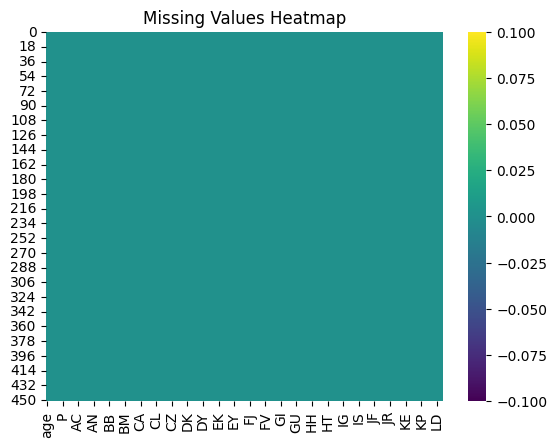

In [ ]:
# Membuat heatmap dari jumlah NA
sns.heatmap(df.isna(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Naive Bayes

In [ ]:
df2 = df.drop(['diagnosis'], axis = 1)

In [ ]:
#Menambahkan kolom id pada dataframe
id = [i for i in range(len(df))]
df['id'] = id

<ipython-input-203-dac69dd5910b>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['id'] = id


In [ ]:
#Membagi data menjadi dataTrain dan dataTest
dataTrain = (df.iloc[0:225].reset_index(drop=True))
dataTest = (df.iloc[225:400].reset_index(drop=True))

In [ ]:
#Merubah diagnosis menjadi 2 macam yaitu 1 jika dia tidak terknea arrythmia dan 0 jika dia terkena arrythmia
dataTrain.loc[dataTrain['diagnosis'] != 1, 'diagnosis'] = 0
dataTest.loc[dataTest['diagnosis'] != 1, 'diagnosis'] = 0

In [ ]:
dataTrain.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis,id
0,75,0,190,80,91,193,371,174,121,-16,...,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,0,0
1,56,1,165,64,81,174,401,149,39,25,...,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,0,1
2,54,0,172,95,138,163,386,185,102,96,...,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,0,2
3,55,0,175,94,100,202,380,179,143,28,...,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1,3
4,75,0,190,80,88,181,360,177,103,-16,...,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,0,4


In [ ]:
def normalizationMinMax(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column]-allData[column].min())/(allData[column].max()-allData[column].min())
  return allData

In [ ]:
#melakukan combine data untuk melakukan normalisasi
testStartID = dataTrain.index.stop
allData = pd.concat([dataTrain, dataTest])
allData = normalizationMinMax(allData,df2)
normTrain, normTest = allData.iloc[:testStartID].drop('id',axis=1),allData.iloc[testStartID:].drop('id',axis=1)

In [ ]:
normTrain.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,0.903614,0.0,1.000000,0.435294,0.236220,0.368321,0.501805,0.241758,0.590244,0.447761,...,1.0,0.381356,0.861538,0.0,NaN,0.516129,0.741667,0.377376,0.646109,0
1,0.674699,1.0,0.705882,0.341176,0.157480,0.332061,0.610108,0.150183,0.190244,0.570149,...,1.0,0.360169,1.000000,0.0,NaN,0.290323,0.675000,0.349810,0.568282,0
2,0.650602,0.0,0.788235,0.523529,0.606299,0.311069,0.555957,0.282051,0.497561,0.782090,...,1.0,0.402542,0.630769,0.0,NaN,0.322581,0.783333,0.272814,0.643172,0
3,0.662651,0.0,0.823529,0.517647,0.307087,0.385496,0.534296,0.260073,0.697561,0.579104,...,1.0,0.516949,0.661538,0.0,NaN,0.354839,0.716667,0.484791,0.735683,1
4,0.903614,0.0,1.000000,0.435294,0.212598,0.345420,0.462094,0.252747,0.502439,0.447761,...,1.0,0.555085,0.446154,0.0,NaN,0.193548,0.825000,0.397338,0.744493,0


In [ ]:
def standardization(allData, columnTarget):
  for column in columnTarget:
    allData[column] = (allData[column]-allData[column].mean())/(allData[column].std())
  return allData

In [ ]:
#Mencari nilai STD
testStartID = dataTrain.index.stop
allData = pd.concat([dataTrain, dataTest])
allData = standardization(allData,df2)
stdTrain, stdTest = allData.iloc[:testStartID].drop('id',axis=1),allData.iloc[testStartID:].drop('id',axis=1)

In [ ]:
stdTrain.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,1.749872,-1.098599,2.639341,0.663531,0.143518,0.811874,0.113096,0.111348,1.179582,-1.154200,...,0.522703,0.063707,0.298992,-0.084488,NaN,1.127296,1.217556,0.299794,1.165795,0
1,0.561504,0.907975,0.069138,-0.315399,-0.534253,0.396397,1.004203,-0.580253,-1.947664,-0.213962,...,0.522703,-0.086901,0.972566,-0.084488,NaN,-0.939782,0.653954,0.076412,0.561098,0
2,0.436413,-1.098599,0.788795,1.581277,3.329041,0.155858,0.558650,0.415652,0.454976,1.414256,...,0.522703,0.214315,-0.823631,-0.084488,NaN,-0.644485,1.569808,-0.547516,1.142976,0
3,0.498958,-1.098599,1.097220,1.520094,0.753512,1.008679,0.380428,0.249668,2.018599,-0.145164,...,0.522703,1.027599,-0.673948,-0.084488,NaN,-0.349188,1.006206,1.170212,1.861766,1
4,1.749872,-1.098599,2.639341,0.663531,-0.059813,0.549468,-0.213643,0.194340,0.493113,-1.154200,...,0.522703,1.298693,-1.721730,-0.084488,NaN,-1.825672,1.922059,0.461553,1.930222,0


In [ ]:
#Membagi data berdasarkan dia terdiagnosis 1 atau 0
def splitTruth(dataTrain, columnTarget):
  truthData = []
  for truth in dataTrain[columnTarget].unique():
    truthData.append(dataTrain.where(dataTrain[columnTarget]==truth).dropna())
  return truthData

yesData, noData = splitTruth(dataTrain, columnTarget='diagnosis')
print(yesData)

      age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
0    75.0  0.0   190.0    80.0          91.0         193.0         371.0   
1    56.0  1.0   165.0    64.0          81.0         174.0         401.0   
2    54.0  0.0   172.0    95.0         138.0         163.0         386.0   
4    75.0  0.0   190.0    80.0          88.0         181.0         360.0   
5    13.0  0.0   169.0    51.0         100.0         167.0         321.0   
9    50.0  1.0   167.0    67.0          89.0         130.0         383.0   
10   62.0  0.0   170.0    72.0         102.0         135.0         401.0   
12   54.0  1.0   172.0    58.0          78.0         155.0         382.0   
13   30.0  0.0   170.0    73.0          91.0         180.0         355.0   
16   47.0  0.0   171.0    59.0          82.0         145.0         347.0   
25   44.0  0.0   169.0    80.0         109.0         128.0         382.0   
26   34.0  0.0   170.0    73.0          94.0         186.0         373.0   
27   31.0  1

In [ ]:
#Mencari mean dari data yang telah terbagi berdasarkan dia terdiagnosis 1 atau 0
def find_mean(yesData, noData, columnTarget):
  yesMean = dict()
  noMean = dict()
  for column in columnTarget:
    yesMean[column] = yesData[column].mean()
    noMean[column] = noData[column].mean()
  return yesMean, noMean

yesMean, noMean = find_mean(yesData, noData, df2)
print('yesMean: ', yesMean,'/n')
print('noMean: ', noMean)

yesMean:  {'age': 47.03061224489796, 'sex': 0.47959183673469385, 'height': 164.72448979591837, 'weight': 69.21428571428571, 'qrs_duration': 92.78571428571429, 'p-r_interval': 153.21428571428572, 'q-t_interval': 371.9591836734694, 't_interval': 170.77551020408163, 'p_interval': 85.53061224489795, 'qrs': 36.36734693877551, 'T': 34.16326530612245, 'P': 52.16326530612245, 'QRST': 36.857142857142854, 'J': -46.82142857142857, 'heart_rate': 72.55102040816327, 'q_wave': 5.428571428571429, 'r_wave': 52.326530612244895, 's_wave': 23.755102040816325, "R'_wave": 0.4897959183673469, "S'_wave": 0.0, 'AA': 30.897959183673468, 'AB': 0.0, 'AC': 0.02040816326530612, 'AD': 0.01020408163265306, 'AE': 0.0, 'AF': 0.01020408163265306, 'AG': 0.030612244897959183, 'AH': 9.10204081632653, 'AI': 56.48979591836735, 'AJ': 21.102040816326532, 'AK': 0.9387755102040817, 'AL': 0.12244897959183673, 'AM': 34.93877551020408, 'AN': 0.01020408163265306, 'AO': 0.061224489795918366, 'AP': 0.01020408163265306, 'AR': 0.0102040

In [ ]:
#Mencari std dari data yang telah terbagi berdasarkan dia terdiagnosis 1 atau 0
def find_std(yesData, noData, columnTarget):
  yesStd = dict()
  noStd = dict()
  for column in columnTarget:
    yesStd[column] = yesData[column].std()
    noStd[column] = noData[column].std()
  return yesStd, noStd

yesStd, noStd = find_std(yesData, noData, df2)
print('yesSTD: ', yesStd,'/n')
print('noSTD: ', noStd)

yesSTD:  {'age': 18.371568173323283, 'sex': 0.5021519020338161, 'height': 11.10008880083816, 'weight': 19.603413336278702, 'qrs_duration': 18.45655249218844, 'p-r_interval': 43.61269322467116, 'q-t_interval': 36.461791431281696, 't_interval': 42.15570808281854, 'p_interval': 26.494583800379132, 'qrs': 45.60416596883934, 'T': 69.94101990617892, 'P': 25.80165977141422, 'QRST': 40.60851568811341, 'J': 56.073830656876666, 'heart_rate': 15.307920225440332, 'q_wave': 12.521322021042312, 'r_wave': 22.741385821369217, 's_wave': 22.662499668540402, "R'_wave": 2.9436105817329823, "S'_wave": 0.0, 'AA': 12.711298485764276, 'AB': 0.0, 'AC': 0.142118858106802, 'AD': 0.10101525445522107, 'AE': 0.0, 'AF': 0.10101525445522107, 'AG': 0.17315041031076067, 'AH': 14.471080151135396, 'AI': 20.470871887494432, 'AJ': 21.80914865060753, 'AK': 4.832911923512055, 'AL': 1.2121830534626532, 'AM': 12.000701290960373, 'AN': 0.10101525445522107, 'AO': 0.2409742481263222, 'AP': 0.10101525445522107, 'AR': 0.10101525445

In [ ]:
def calc_probality(mean, std, x):
  exponent = math.exp(-((x-mean)**2/(2*std**2)))
  return (1/(math.sqrt(2*math.pi)*std))*exponent

In [ ]:
def confussionMatrix(result):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    x = True

    for i in result:
        if(i['Ground Truth'] == '?'):
            x = False
            break
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] == i['Ground Truth'])):
            TP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] == i['Ground Truth'])):
            TN += 1
        elif((i['Prediction Result'] == 1)and(i['Prediction Result'] != i['Ground Truth'])):
            FP += 1
        elif((i['Prediction Result'] == 0)and(i['Prediction Result'] != i['Ground Truth'])):
            FN += 1
    if(x):
        print(f"\nTP : {TP} FN : {FP}\nTN : {TN} FN : {FN}")
        print(f"Accuracy : {((TP+TN)/(TP+TN+FP+FN))*100}%")
        print(f"Precission : {((TP)/(TP+FP))*100}%")
        print(f"Recall : {((TP)/(TP+FN))*100}%")
    else:
        print("\nCannot process the confussion matrix with unknown Ground Truth!")

In [ ]:
#Membuat fungsi prediksi
def doPrediction(yesMean, yesStd, noMean, noStd, target, columnTarget, truthColumn):
  result = []
  for i in range(len(target)):
     noResult = 1
     yesResult = 1
     for column in columnTarget:
      if column != 'sex':
        noResult *= calc_probality(noMean[column], noStd[column], target[column].iloc[i])
        yesResult *= calc_probality(yesMean[column], yesStd[column], target[column].iloc[i])
     if noResult > yesResult:
      p_r = 0
     else:
      p_r = 1
     result.append({'ID' : i, 'No Probability' : "{}".format(noResult), 'yes Probability' : "{}".format(yesResult),
                     'Prediction Result' : p_r,
                     'Ground Truth' : target[truthColumn].iloc[i]})
  return result

In [ ]:
#Menghapus data serta kolom yang bernilai 0
to_delete = [k for k, v in yesMean.items() if v in [0]]
for key in to_delete:
    del yesMean[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in noMean.items() if v in [0]]
for key in to_delete:
    del noMean[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in yesStd.items() if v in [0]]
for key in to_delete:
    del yesStd[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in noStd.items() if v in [0]]
for key in to_delete:
    del noStd[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

In [ ]:
# hasil
result = []
target = dataTest

result = doPrediction(yesMean, yesStd, noMean, noStd, target, columnTarget=df2, truthColumn='diagnosis')

for p in result:
    print(p)

confussionMatrix(result)



{'ID': 0, 'No Probability': '0.0', 'yes Probability': '5.320927235948693e-243', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 1, 'No Probability': '3.0099029550551733e-196', 'yes Probability': '2.7085495459644018e-207', 'Prediction Result': 0, 'Ground Truth': 1}
{'ID': 2, 'No Probability': '0.0', 'yes Probability': '1.88682441107567e-235', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 3, 'No Probability': '2.972361859866253e-187', 'yes Probability': '1.340086292931926e-212', 'Prediction Result': 0, 'Ground Truth': 1}
{'ID': 4, 'No Probability': '0.0', 'yes Probability': '7.795782672681421e-226', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 5, 'No Probability': '8.173186926968654e-181', 'yes Probability': '6.261357080237502e-205', 'Prediction Result': 0, 'Ground Truth': 1}
{'ID': 6, 'No Probability': '3.753931174371476e-276', 'yes Probability': '6.675012011182066e-229', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 7, 'No Probability': '1.553494755911536e-265', 'yes Pro

#Optimasi dengan Folding

In [ ]:
def folding(dataset, trainingPercentage, location, shuffle:bool):
    lengthTraining = int(len(dataset)*trainingPercentage/100)
    # randomize the the data position
    if(shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    train = []
    validation = []
    if(location == 'left'):
        train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[lengthTraining:].reset_index(drop=True)
    elif(location == 'right'):
        validation,train = dataset.iloc[:abs(lengthTraining-len(dataset))].reset_index(drop=True), dataset.iloc[abs(lengthTraining-len(dataset)):].reset_index(drop=True)
    elif(location == 'middle'):
        train = dataset.iloc[int(abs(lengthTraining-len(dataset))/2):len(dataset)-int(abs(lengthTraining-len(dataset))/2)]
        validation = pd.concat([dataset.iloc[:int(abs(lengthTraining-len(dataset))/2)],dataset.iloc[len(dataset)-int(abs(lengthTraining-len(dataset))/2):]])

    return train, validation

In [ ]:
trainData, validationData = folding(dataTrain.copy(), 70, 'left',shuffle=True)

In [ ]:
# Split yes and no
yesDataTrain, noDataTrain = splitTruth(trainData, columnTarget='diagnosis')
# Find mean
yesMeanTrain, noMeanTrain = find_mean(yesDataTrain, noDataTrain, columnTarget=df2)
# Find standard deviation
yesStdTrain, noStdTrain = find_std(yesDataTrain, noDataTrain, df2)

In [ ]:
#Menghapus data serta kolom yang bernilai 0
to_delete = [k for k, v in yesMeanTrain.items() if v in [0]]
for key in to_delete:
    del yesMeanTrain[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in noMeanTrain.items() if v in [0]]
for key in to_delete:
    del noMeanTrain[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in yesStdTrain.items() if v in [0]]
for key in to_delete:
    del yesStdTrain[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

to_delete = [k for k, v in noStdTrain.items() if v in [0]]
for key in to_delete:
    del noStdTrain[key]
    if key in df2.columns:
        df2.drop(key, axis=1, inplace=True)

In [ ]:
result = []
target = validationData # your ground truth data
result = doPrediction(yesMeanTrain, yesStdTrain, noMeanTrain, noStdTrain, target, columnTarget=df2, truthColumn='diagnosis')
for p in result:
    print(p)
confussionMatrix(result)

{'ID': 0, 'No Probability': '4.243765242916598e-215', 'yes Probability': '5.542405560884503e-209', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 1, 'No Probability': '0.0', 'yes Probability': '0.0', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 2, 'No Probability': '1.4508581194377704e-211', 'yes Probability': '2.459423033894754e-205', 'Prediction Result': 1, 'Ground Truth': 0}
{'ID': 3, 'No Probability': '3.440146930164149e-215', 'yes Probability': '1.4675955214341477e-189', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 4, 'No Probability': '5.501547527475955e-231', 'yes Probability': '1.1222358918778643e-215', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 5, 'No Probability': '1.1231273822864456e-208', 'yes Probability': '1.2282946434751588e-187', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 6, 'No Probability': '2.16665533387975e-214', 'yes Probability': '1.7614414547443901e-189', 'Prediction Result': 1, 'Ground Truth': 1}
{'ID': 7, 'No Probability': '1.32762599